In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Import data

In [2]:
df = pd.read_csv(
    './supervised_ensemble/data/housing.data',
    header=None, sep=r'\s*', engine='python'
)
df.columns = [
    'crim', # numerical
    'zn', # numerical
    'nonretail', # numerical
    'river', # binary
    'nox', # numerical
    'rooms', # numerical
    'age', # numerical
    'dis', # numerical
    'rad', # numerical
    'tax', # numerical
    'ptratio', # numerical
    'b', # numerical
    'lstat', # numerical
    'medv', # numerical -- this is the target
]

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim         506 non-null float64
zn           506 non-null float64
nonretail    506 non-null float64
river        506 non-null int64
nox          506 non-null float64
rooms        506 non-null float64
age          506 non-null float64
dis          506 non-null float64
rad          506 non-null int64
tax          506 non-null float64
ptratio      506 non-null float64
b            506 non-null float64
lstat        506 non-null float64
medv         506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [21]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=15)

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
X_train = df_train.drop(['medv'], axis=1)
Y_train = df_train['medv']
X_test = df_test.drop(['medv'], axis=1)
Y_test = df_test['medv']

Apply standard scaler to both train and test data. *Base on training data.*
Also Log transformation for target value

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
Y_train = np.log(Y_train.values)
X_test = scaler.transform(X_test)
Y_test = np.log(Y_test.values)

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


ymin: 2.0 ymax: 4.0


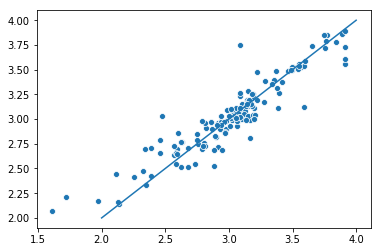

In [24]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

sns.scatterplot(Y_test, prediction)

ymin = np.round( min( min(Y_test), min(prediction) ) )
ymax = np.ceil( max( max(Y_test), max(prediction) ) )
print("ymin:", ymin, "ymax:", ymax)
r = range(int(ymin), int(ymax) + 1)
sns.lineplot(r, r)

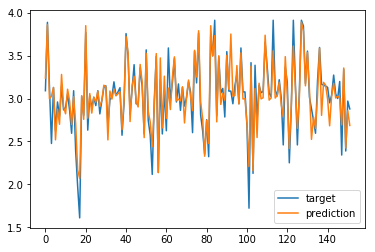

In [25]:
plt.plot(Y_test, label='target')
plt.plot(prediction, label='prediction')
plt.legend()

In [26]:
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, Y_train).mean())
print("CV baseline:", cross_val_score(baseline, X_train, Y_train).mean())
print("CV forest:", cross_val_score(model, X_train, Y_train).mean())

# test score
single_tree.fit(X_train, Y_train)
baseline.fit(X_train, Y_train)
print("test score single tree:", single_tree.score(X_test, Y_test))
print("test score baseline:", baseline.score(X_test, Y_test))
print("test score forest:", model.score(X_test, Y_test))

CV single tree: 0.7214736420206024
CV baseline: 0.7610527691137151
CV forest: 0.8151054650781987
test score single tree: 0.7483611755365123
test score baseline: 0.7431027946354415
test score forest: 0.8583147755115054


/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
